<table border="1" cellpadding="5" cellspacing="0" width="100%">
   <tr>
      <!--<td align="left" valign="top" width="120"><img src="./pictures/octopeek-logo.png" width="120" /></td>-->
      <td align="left" valign="top" width="120"><img src="https://media-exp1.licdn.com/dms/image/C510BAQE93sqc09g7qg/company-logo_200_200/0?e=2159024400&v=beta&t=Ebcbl-_mVoiGn-jo8xRX3V0iuAckEhZXnLKcmnOv2Wk" width="120" /></td>
      <td valign="top" width="100%" align="center"><h1><font color="blue">Enseignement d'Intégration - Sujet Octopeek</font></h1>
      <p align="right"><h2>Analyse de sentiments sur des Tweets</h2></p>
   </tr>
</table>

# Données d'entrainement

Ce notebook est destiné à la préparation des données d'entrainement. Les données vous permettront d'entrainer un modèle de prédiction de sentiment dans le texte. Ce travail est indépendant des données de votre projet.

In [1]:
import pandas as pd
import pickle
import re
import unicodedata
import utils
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud

## Récupération de données d'entrainement

Trouvez sur internet des jeux de données (au minium 2) en langue anglaise pouvant permettre d'entrainer un modèle de prédiction de polarité. Chaque ligne du jeu de données doit avoir au minimum un texte brut ainsi qu'un label de polarité. Le jeu de données ne doit pas forcement être composé de tweets. A noter cependant que votre modèle final sera évalué sur des données de type tweets.

Conservez la source de ces données (le lien vers les données et l'article scientifique s'il existe). Vous devez présenter (dans votre rapport et durant la présentation) les données, et les avantages / désavantages :

 1. des labels de ces données ;
 2. de la fiabilité de leur collecte ou de leur détermination (par ceux qui ont construit le jeu de données) ;
 3. des données en elles-mêmes vis-à-vis de vos besoins.

In [2]:
# ----SS-Twitter----

sstwt_df = pd.read_csv('datasets/SS-Twitter/twitter4242.txt', sep='\t')


# ----STS Test----

sts_df = pd.read_csv('datasets/STS-Test/dataset.csv', sep=',')


# ----SemEval----

semeA_df = pd.read_csv('datasets/semeval/testA.txt', sep='\t')
semeA_df.rename(columns={'negative': 'labels',
                         '\* she photoshops out a gap in her chipped tooth a gap that she can whistle through \*': 'text'}, inplace=True)
semeA_df.dropna(axis=0, inplace=True)

semeB_df = pd.read_csv('datasets/semeval/testA.txt', sep='\t')
semeB_df.rename(columns={
                '\* she photoshops out a gap in her chipped tooth a gap that she can whistle through \*': 'text', 'negative': 'labels'}, inplace=True)
semeB_df.dropna(axis=0, inplace=True)

seme_df = pd.concat([semeA_df, semeB_df])

<div class="alert alert-block alert-success">
Vous devez choisir un jeu de données qui permettra à votre modèle de bien généraliser et bien s’entraîner. Vous pouvez en choisir plusieurs et les fusionner. Justifiez vos choix dans le rapport. Ici l'important c'est de réussir le challenge, quitte à être un peu moins précis sur le "domaine" de vos données projet.
</div>

<div class="alert alert-block alert-success">
Vérifiez bien que votre jeu de donnée comporte la classe "neutral" (regardez bien en parcourant les données car certains jeux de données prévoient cette classe mais n'ont aucun tweet de cette classe). Dans vos données projet, la plupart des tweets ne correspondront à aucun sentiment, ils seront neutres. Le problème est que votre modèle entraîné avec ce type de jeu de données ne pourra pas vous prédire les tweets neutres, il donnera toujours soit positif soit négatif. Il y a 2 solutions à cela : soit vous utilisez un autre jeu de données, soit vous introduisez des tweets aléatoirement qui ne viennent pas d'un jeu de données de sentiment et vous les considérez neutres. Cette solution peut biaiser l'apprentissage, mais vous profitez de plus de données. Attention à être cohérent en terme de nombre d'echantillons (avoir un nombre de tweets neutres du même ordre de grandeur). Nous pouvons vous fournir des tweets aléatoires si vous le demandez.
</div>

## Sauvegarde des données brutes

Sauvegardez le jeu de données en fichier serialisé "pickle". Le format doit correspondre à notre format, i.e. une liste de dictionnaires ayant au minimum les champs `text` et `polarity`. Si les données sont des *tweets*, vous devez ajouter le champs `id`. Exemple `[{'text': 'Raw text of the first sample.', 'polarity': 'neutral'}, {'text': 'Raw text of the second sample.', 'polarity': 'positive'}, ...]`.

Vous nommerez le fichier `group<X>_<dataname>_rawdata.pickle` avec `X` le numéro de votre groupe et `dataname` le nom du dataset en enlevant les chevrons. Si le jeu de données n'a pas de nom, vous pouvez en inventer un qui reflète la source (e.g. le site web, l'article source) ou le "domaine" des données (i.e. le topic, le type de données texte).

In [ ]:
# Conversion en liste de dictionnaires :


In [ ]:
# Serialisation pickle :


<div class="alert alert-block alert-success">
Lorsque vous ne connaissez pas un outil ou une notion, le premier réflèxe que vous devez avoir est de <b>comprendre</b> et <b>trouver des exemples</b>. Pour la sauvegarde pickle, vous chercherez par exemple "pickle" sur un moteur de recherche et vous trouverez la <a href="https://docs.python.org/3/library/pickle.html">documentation</a> ou des <a href="https://yasoob.me/2013/08/02/what-is-pickle-in-python">articles expliquant son utilisation</a>. Lorsqu'il s'agit de traitements basiques comme pour la sauvegarde pickle, vous chercherez des exemples à copier en tapant par exemple "How to pickle a list?", vous trouverez alors des <a href="https://stackoverflow.com/questions/25464295/how-to-pickle-a-list/25465148">solutions</a>, souvent sur le site *StackOverflow*.
</div>

## Prétraitement du texte brut

Vous devez prétraiter les données textuelles en éliminant les liens, les accents et les caractères spéciaux. Vous devez conserver les émoticônes, les hashtags et les mentions @. Les labels doivent prendre les valeurs `-1` pour négatif, `0` pour neutre et `1` pour positif. Si l'échelle est pus grande, appliquez des seuils en justifiant vos choix.

In [3]:
import utils

<div class="alert alert-block alert-success">
Vous aurez besoin de ces fonctions pour la suite du projet, nous vous conseillons de les exportées dans un fichier nommé <strong>utils.py</strong>. Puis importez le module dans la cellcule au dessus. Vous placerez toutes les fonctions communes aux différents notebook dans ce fichier.
</div>

In [4]:
raw_tweets_ss = sstwt_df['Tweet']
pp_tweets_ss = []
for t in raw_tweets_ss:
    pp_tweets_ss.append(utils.preprocess_tweet(t))

raw_tweets_sts = sts_df['text']
pp_tweets_sts = []
for t in raw_tweets_sts:
    pp_tweets_sts.append(utils.preprocess_tweet(t))

raw_tweets_seme = seme_df['text']
pp_tweets_seme = []
for t in raw_tweets_seme:
    pp_tweets_seme.append(utils.preprocess_tweet(t))



In [6]:
# SS-Twitter

mean_pos_list = sstwt_df['mean pos']
mean_neg_list = sstwt_df['mean neg']
labels_ss = []
for i in range(len(mean_pos_list)):
    n, p = int(mean_neg_list[i]), int(mean_pos_list[i])
    r = p/n
    if r == 1:
        labels_ss.append(0)
    elif r >= 1.5:
        labels_ss.append(1)
    else:
        labels_ss.append(-1)

df_ss = pd.DataFrame()
df_ss['labels'] = labels_ss
df_ss['text'] = pp_tweets_ss

        
# STS-Test

labels_pre = sts_df['polarity'].copy()
labels_post_sts = []
for l in labels_pre:
    switcher = {0: -1, 2: 0, 4: 1}
    labels_post_sts.append(switcher.get(l))
    
df_sts = pd.DataFrame()
df_sts['labels'] = labels_post_sts
df_sts['text'] = pp_tweets_sts
    
    
# SemEval

labels_pre_seme = seme_df['labels'].copy()
labels_post_seme = []
for l in labels_pre_seme:
    switcher = {'negative': -1, 'neutral': 0, 'positive': 1}
    labels_post_seme.append(switcher.get(l))

df_seme = pd.DataFrame()
df_seme['labels'] = labels_post_seme
df_seme['text'] = pp_tweets_seme

<div class="alert alert-block alert-success">
Lorsque vous prétraitez le jeu de données, évitez d'effectuer les étapes de <strong>tokenization</strong> et de <strong>lemmatization</strong> qui vont trop dénaturer les données brutes, ceci afin d'éviter de ne trop contraindre l'utilisation des modèles que vous pourrez utiliser.
</div>

## Sauvegarde des données prétraitées

Sauvegardez les données prétraitées selon le même format (liste de dicts pickle) en nommant le fichier `group<X>_<dataname>_preprocessed.pickle`.

In [7]:
# Sauvegarde des données en fichier .pickle :

df_ss = df_ss[df_ss.text != '']
df_ss.to_json('datasets/SS-twitter/pp.json', orient='records')

df_sts = sf_sts[df_sts.txt != '']
df_sts.to_json('datasets/STS-Test/pp.json', orient='records')

df_seme = sf_seme[df_seme.txt != '']
df_seme.to_json('datasets/semeval/pp.json', orient='records')

NameError: name 'df' is not defined

## Statitiques

Cette partie est libre. Vous proposerez un aperçu de votre jeu de données pour votre rapport et présentation. Vous pourez par exemple donner le nombre d'exemples dans votre jeu de données, la taille moyenne des textes, la proportion de chaque label. Vous proposerez un visuel, par exemple un nuage de mots en utilisant un model de topic modeling (NMF ou LDA), en utilisant [WordCloud](https://github.com/amueller/word_cloud) (vous trouverez des exemples) ou encore en utilisant la pondération TFIDF en intégrant d'autres tweets externes. Ces méthodes vous permettent d'éviter d'afficher des mots communs tels que "day", "shall", "section" que vous n'aurez pas supprimés via une liste de *stop words*. Vous pouvez trouver d'autres visuels tels qu'un histogramme des émoticônes en fonction de la polarité ou tout autre graphe original...

In [8]:
print('-- SS-Twitter --')
print("Nombre de tweets : ",len(df_ss))
print("Taille moyenne d'un tweet : ",utils.mean_tweet_size(df_ss),end='\n')

print('-- STS-Test --')
print("Nombre de tweets : ",len(df_sts))
print("Taille moyenne d'un tweet : ",utils.mean_tweet_size(df_sts),end='\n')

print('-- SemEval --')
print("Nombre de tweets : ",len(df_seme))
print("Taille moyenne d'un tweet : ",utils.mean_tweet_size(df_seme),end='\n')

print('-- TOTAL --')
print("Nombre de tweets : ",len(pd.concat([df_ss,df_sts,df_seme])))
print("Taille moyenne d'un tweet : ",utils.mean_tweet_size(pd.concat([df_ss,df_sts,df_seme])))

-- SS-Twitter --
Nombre de tweets :  3619
Taille moyenne d'un tweet :  75
-- STS-Test --
Nombre de tweets :  498
Taille moyenne d'un tweet :  67
-- SemEval --
Nombre de tweets :  7068
Taille moyenne d'un tweet :  76
-- TOTAL --
Nombre de tweets :  11185
Taille moyenne d'un tweet :  75


[]

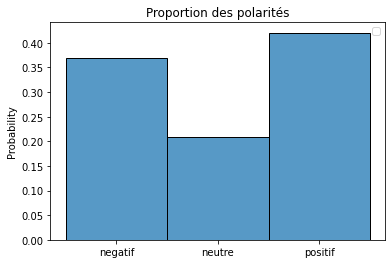

In [30]:
# Création de, au moins, un graphique :
df = pd.concat([df_ss,df_sts,df_seme])
hist = sns.histplot(df,discrete=True,stat="probability")
hist.set_xticks([-1,0,1])
hist.set_xticklabels(['negatif','neutre','positif'])
hist.set_title("Proportion des polarités")
plt.legend('')
plt.plot()

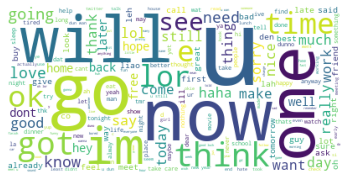

In [31]:
wc = wordcloud.WordCloud(background_color='white').generate(' '.join(df['text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

<div class="alert alert-block alert-success">
Pour la partie graphique, vous pouvez utiliser <a href="https://docs.bokeh.org/en/latest/index.html">Bokeh</a> ou <a href="https://matplotlib.org/">Matplotlib</a>. Encore une fois, n'hésitez pas à reprendre des exemples sur internet.
</div>